# Experiments

#### Gouttham Chandrasekar, Sachal Dhillon, Trishul Nagenalli
#### ECE 590: Deep Learning Final Project


### Experiment 1: Different Neural Network Architectures to solve the 1D Heat Dimension problems

Methodology:
1. Generate a dataset of bar evolving from different initial conditions due to to heat sources on different ends of the rod
2. Architectures:
    - Dense Net
    - 1D Conv Net
    - 1D Conv Net auto forward endpoints

In [149]:
from torchdiffeq import truths, models, execs as ex, vizualization as viz
import torch
from matplotlib import pyplot as plt
import importlib

importlib.reload(truths)
importlib.reload(models)
importlib.reload(ex)
importlib.reload(viz)

<module 'torchdiffeq.vizualization' from '/Users/trishul/Documents/Duke/s7/deep_learning/finalproj/torchdiffeq/vizualization.py'>

/Users/trishul/Documents/Duke/s7/deep_learning/dlenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


<Figure size 432x288 with 0 Axes>

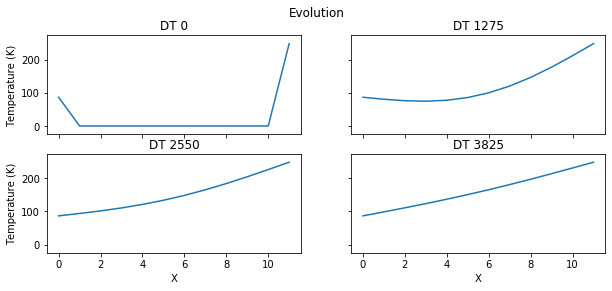

In [162]:
DT = 0.01
T_FINAL = 51
T = torch.linspace(0, T_FINAL, int(T_FINAL/DT) + 1)
ROD_DATA = truths.generate_one_dim_heat_dataset(dt=DT, t_final=T_FINAL)
viz.graph_oned_evolution(ROD_DATA[1]).show()


Iter 0600 | Total Loss 0.005335
Iter 1200 | Total Loss 0.006478
Iter 1800 | Total Loss 0.007075
Iter 2400 | Total Loss 0.005602
Iter 3000 | Total Loss 0.002981
Iter 0600 | Total Loss 0.011548
Iter 1200 | Total Loss 0.005386
Iter 1800 | Total Loss 0.013062
Iter 2400 | Total Loss 0.002262
Iter 3000 | Total Loss 0.006166
Iter 0600 | Total Loss 0.035994
Iter 1200 | Total Loss 0.003371
Iter 1800 | Total Loss 0.008730
Iter 2400 | Total Loss 0.000720
Iter 3000 | Total Loss 0.001375


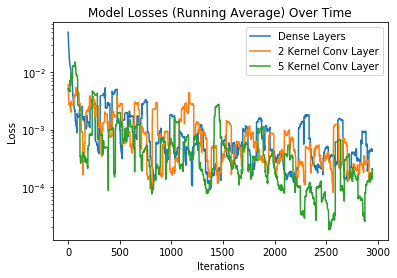

In [160]:
NITERS = 3000

def report_on_model(model):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    train_loader = truths.TruthSampler(T, ROD_DATA, batch_time=3, batch_size=3).sample
    return ex.train(model, train_loader, optimizer, niters=NITERS, test_freq=NITERS/5);
state_shape = (1, 12)
train_models = {
    "Dense Layers": models.DenseLayers1DimODE(state_shape=state_shape),
    "2 Kernel Conv Layer": models.ConvLayers1DimODE(state_shape=state_shape, kernels=2),
    "5 Kernel Conv Layer": models.ConvLayers1DimODE(state_shape=state_shape, kernels=5),
}
losses = {}
ITERS = [i for i in range(NITERS)]
for n, m in train_models.items():
    losses[n] = report_on_model(m)
    avg_len = 50
    loss_plot = [sum(losses[n][i: i+avg_len])/avg_len for i in range(len(ITERS)-avg_len)]
    plt.plot(ITERS[:-avg_len], loss_plot, label=n)
plt.title("Model Losses (Running Average) Over Time")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.yscale('log')

    


/Users/trishul/Documents/Duke/s7/deep_learning/dlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
/Users/trishul/Documents/Duke/s7/deep_learning/dlenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


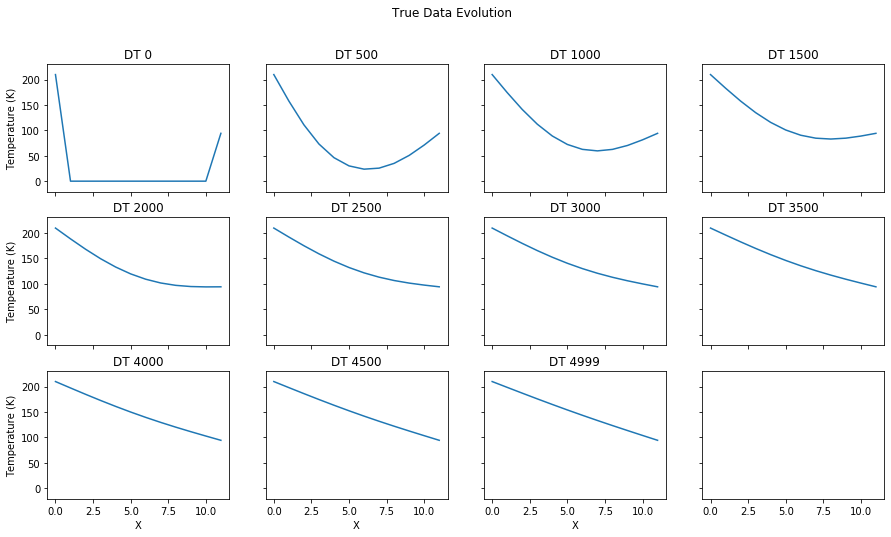

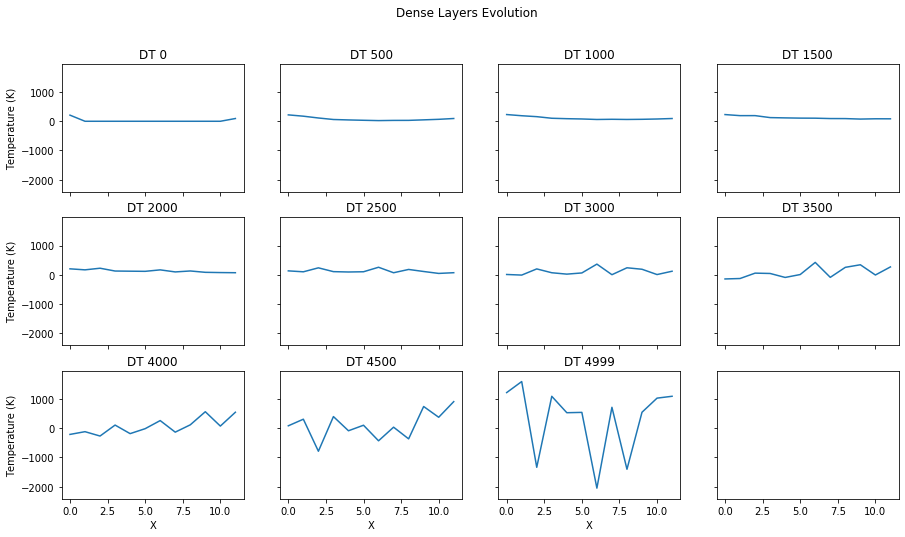

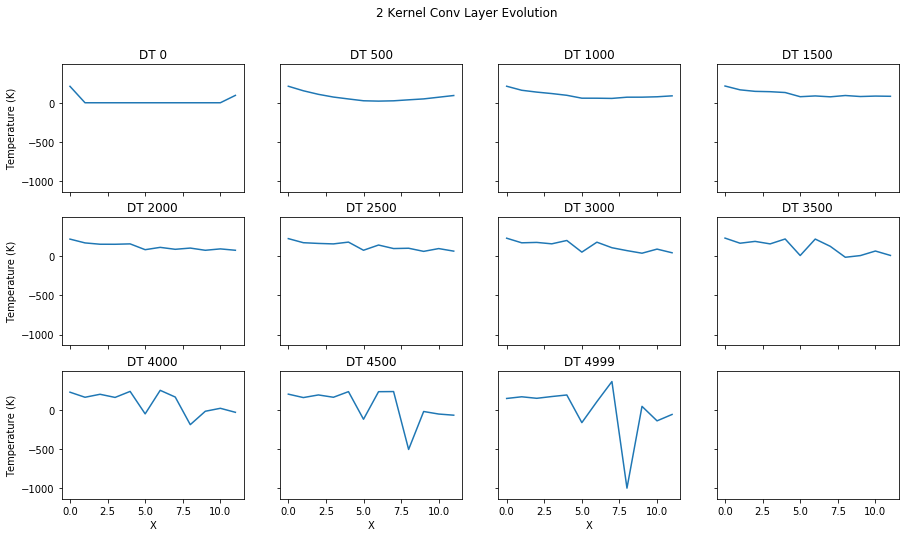

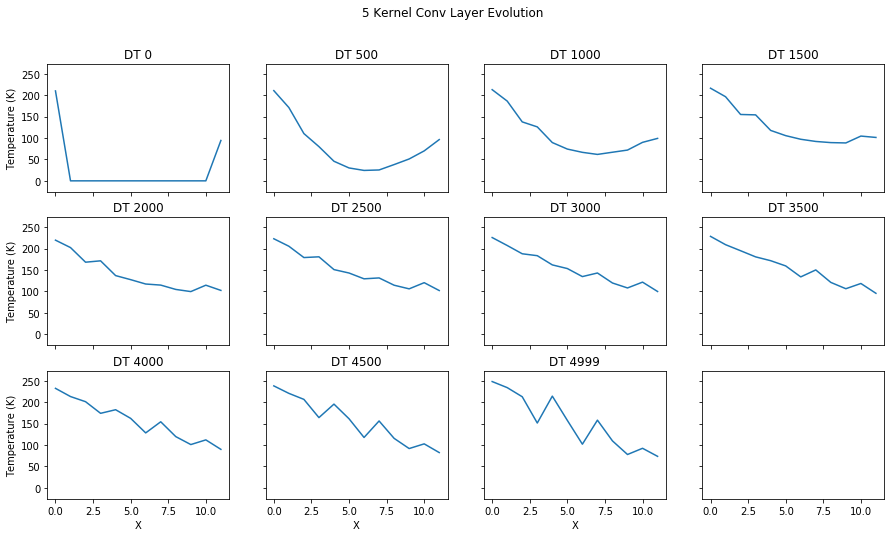

In [161]:
iters_viz = 5000
viz.graph_oned_evolution(ROD_DATA[0][:iters_viz], plot_count=10, figtitle="True Data Evolution").show()
for n, m in train_models.items():
    evolution = ex.get_model_evolution(m, y0=ROD_DATA[0][0:2], t=T)
    viz.graph_oned_evolution(evolution[0][:iters_viz], plot_count=10, figtitle=f"{n} Evolution").show()


## Batch Size Manipulation

In [187]:
# BATCH_DATA = [ {"size": 10}, {"size": 10}, {"size": 100}, {"size": 1000}]
NITERS = 3000
ITERS = [i for i in range(NITERS)]
AVG_LEN = 50

def report_on_model(model, batch_size):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    train_loader = truths.TruthSampler(T, ROD_DATA, batch_time=3, batch_size=batch_size).sample
    return ex.train(model, train_loader, optimizer, niters=NITERS, test_freq=NITERS/5);

for b in BATCH_DATA:
    if "model" in b:
        continue
    b["model"] = models.ConvLayers1DimODE(state_shape=(1, 12), kernels=2)
    b["losses"] = report_on_model(b["model"], b["size"])

Iter 0600 | Total Loss 0.003602
Iter 1200 | Total Loss 0.005281
Iter 1800 | Total Loss 0.006063
Iter 2400 | Total Loss 0.002518
Iter 3000 | Total Loss 0.005461
Iter 0600 | Total Loss 0.005204
Iter 1200 | Total Loss 0.006159
Iter 1800 | Total Loss 0.003064
Iter 2400 | Total Loss 0.002605
Iter 3000 | Total Loss 0.008552
Iter 0600 | Total Loss 0.005360
Iter 1200 | Total Loss 0.003096
Iter 1800 | Total Loss 0.001192
Iter 2400 | Total Loss 0.001742
Iter 3000 | Total Loss 0.001189
Iter 0600 | Total Loss 0.006868
Iter 1200 | Total Loss 0.006113
Iter 1800 | Total Loss 0.004615
Iter 2400 | Total Loss 0.003558
Iter 3000 | Total Loss 0.001522


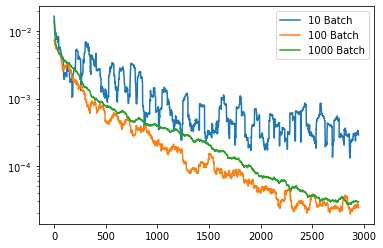

In [184]:
for info in BATCH_DATA:
    loss_plot = [sum(info["losses"][i: i+avg_len])/avg_len for i in range(len(ITERS)-avg_len)]
    plt.plot(ITERS[:-avg_len], loss_plot, label= f"{info['size']} Batch")
    plt.yscale('log')
    plt.legend()

/Users/trishul/Documents/Duke/s7/deep_learning/dlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
/Users/trishul/Documents/Duke/s7/deep_learning/dlenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


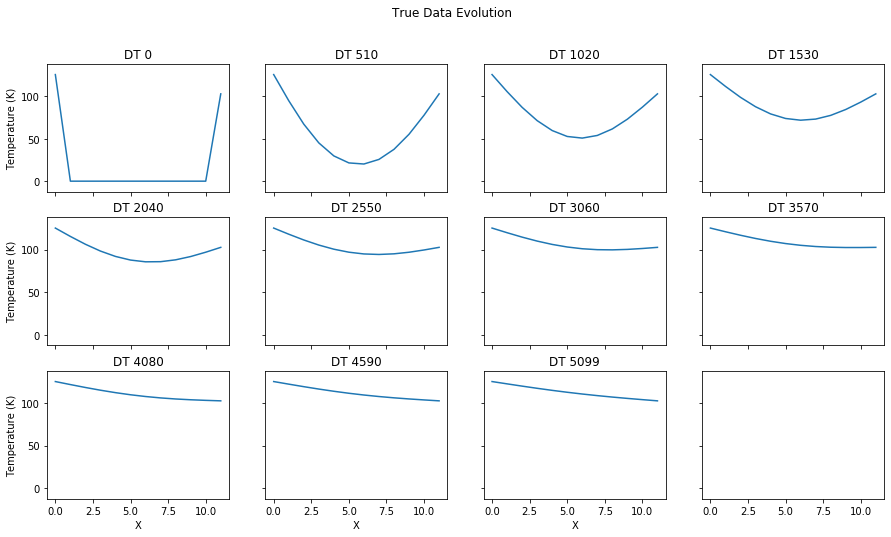

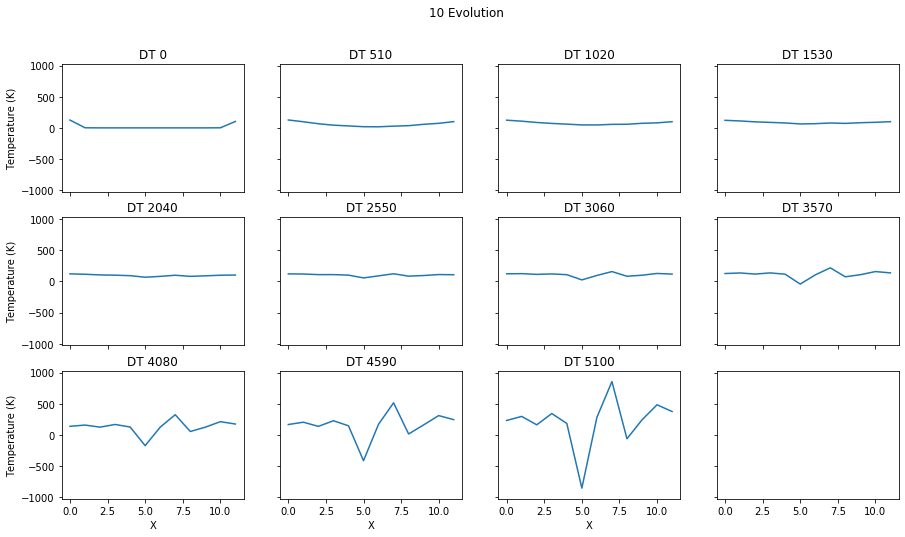

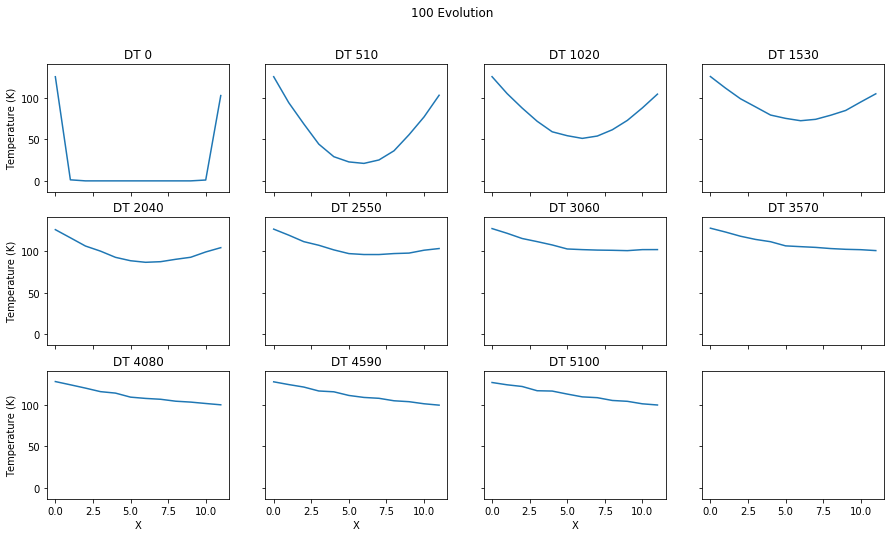

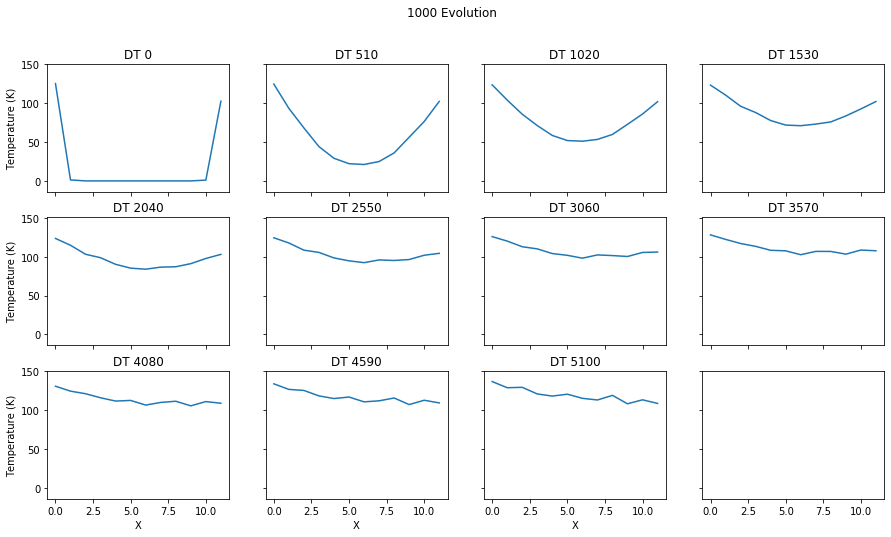

In [186]:
iters_viz = 8000
viz.graph_oned_evolution(ROD_DATA[0][:iters_viz], plot_count=10, figtitle="True Data Evolution").show()
for info in BATCH_DATA:
    evolution = ex.get_model_evolution(info["model"], y0=ROD_DATA[0][0:3], t=T)
    viz.graph_oned_evolution(evolution[1][:iters_viz], plot_count=10, figtitle=f"{info['size']} Evolution").show()


It seems like batch size does help us in this case. Moving with larger batch sizes appears to make the loss go down faster and encourage smoothing effects on the time series evolution. There does seem to be a ceiling through? 100 does better than 1000